## COVID19 - Analysis and Imapct of Novel Coronavirus on TOP 5 Nations.

### Understanding of the problem statements
There are 3 questions we would like to answer from our data.

1. Which TOP 5 nation are affected by COVID-19?
2. What is the rate of recovery among TOP 5 Nations?
3. What is the rate of mortality due to COVID-19 among these Nations?

These questions will help us understand the impact of COVID-19 globally and also help to gain insight on the its severity to human life.

### Data Source 

- Novel Coronavirus (COVID-19) Cases Data - [here](https://data.humdata.org/m/dataset/novel-coronavirus-2019-ncov-cases)

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates


plt.style.use('seaborn')

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Read CSV 

In [2]:
global_confirmed = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
global_recovered = pd.read_csv('data/time_series_covid19_recovered_global.csv')
global_death = pd.read_csv('data/time_series_covid19_deaths_global.csv')

### Preview of raw data

In [3]:
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


In [4]:
global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,43,54,99,112,131,135,150,166,179,188
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,251,277,283,302,314,327,345,356,385,394
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,708,783,846,894,1047,1099,1152,1204,1355,1408
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,169,169,191,205,235,248,282,309,333,344
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,6


In [5]:
global_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,25,30,30,30,33,36,36,40,42,43
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,25,26,26,26,26,26,26,27,27,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,336,348,364,367,375,384,392,402,407,415
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,33,33,35,35,36,37,37,37,37,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


### Check for duplicate and missing Values

In [6]:
global_confirmed.shape

(264, 98)

In [7]:
len(global_confirmed['Country/Region'].unique())

185

### Pre Process data

In [8]:
#Drop non essential columns
global_confirmed = global_confirmed.drop(columns=['Province/State','Lat','Long'])

#Transpose
global_confirmed = global_confirmed.set_index('Country/Region').T

#Change Index to Datetime
global_confirmed.index = pd.to_datetime(global_confirmed.index)

#Merge duplicate columns and sum
global_confirmed = global_confirmed.groupby(by=global_confirmed.columns, axis=1).sum()
global_confirmed.shape

(94, 185)

In [9]:
#Drop non essential columns
global_recovered = global_recovered.drop(columns=['Province/State','Lat','Long'])

#Transpose
global_recovered = global_recovered.set_index('Country/Region').T

#Change Index to Datetime
global_recovered.index = pd.to_datetime(global_recovered.index)

#Merge duplicate columns and sum
global_recovered = global_recovered.groupby(by=global_recovered.columns, axis=1).sum()
global_recovered.shape

(94, 185)

In [10]:
#Drop non essential columns
global_death = global_death.drop(columns=['Province/State','Lat','Long'])

#Transpose
global_death = global_death.set_index('Country/Region').T

#Change Index to Datetime
global_death.index = pd.to_datetime(global_death.index)


#Merge duplicate columns and sum
global_death = global_death.groupby(by=global_death.columns, axis=1).sum()
global_death.shape

(94, 185)

### Preview processed Data

In [11]:
global_confirmed.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-20,1026,584,2718,717,24,23,2941,1339,6623,14795,...,125856,535,1627,256,268,449,6,1,65,25
2020-04-21,1092,609,2811,717,24,23,3031,1401,6645,14873,...,130172,535,1678,285,268,466,6,1,70,28
2020-04-22,1176,634,2910,723,25,24,3144,1473,6652,14925,...,134638,543,1716,288,268,474,6,1,74,28
2020-04-23,1279,663,3007,723,25,24,3435,1523,6662,15002,...,139246,557,1758,311,268,480,6,1,76,28
2020-04-24,1351,678,3127,731,25,24,3607,1596,6677,15071,...,144640,563,1804,318,270,484,6,1,84,29


In [12]:
global_recovered.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-20,135,327,1099,248,6,3,737,580,4124,10631,...,446,313,261,117,214,71,0,0,35,2
2020-04-21,150,345,1152,282,6,7,840,609,4124,10971,...,638,313,357,117,216,71,0,0,35,2
2020-04-22,166,356,1204,309,6,10,872,633,4124,11328,...,683,324,450,122,223,71,0,0,35,2
2020-04-23,179,385,1355,333,6,10,919,659,4124,11694,...,712,354,561,126,224,92,5,0,37,2
2020-04-24,188,394,1408,344,6,11,976,728,4124,11872,...,724,369,621,132,220,92,5,1,37,2


In [13]:
global_death.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-20,36,26,384,37,2,3,136,22,67,470,...,16550,10,5,9,0,3,0,0,3,3
2020-04-21,36,26,392,37,2,3,147,24,67,491,...,17378,11,6,10,0,4,0,0,3,3
2020-04-22,40,27,402,37,2,3,152,24,67,510,...,18151,12,7,10,0,4,0,0,3,4
2020-04-23,42,27,407,37,2,3,165,24,75,522,...,18791,12,7,10,0,4,0,0,3,4
2020-04-24,43,27,415,40,2,3,176,27,79,530,...,19567,12,8,10,0,4,0,0,3,4


In [14]:
print("Date Range : ", global_confirmed.index.min(), ' to ',global_confirmed.index.max())

Date Range :  2020-01-22 00:00:00  to  2020-04-24 00:00:00


### 1. Find Top 5 affected nation globally (Data range from 22-Jan-2020 to 24-Apr-2020)



In [15]:
last_col = global_confirmed.T.columns[-1]
last_col

Timestamp('2020-04-24 00:00:00')

In [16]:
top_5_affected = global_confirmed.T.nlargest(5,[last_col])
top_5_affected = top_5_affected.T
top_5_affected.tail()

Country/Region,US,Spain,Italy,France,Germany
2020-04-20,784326,200210,181228,155393,147065
2020-04-21,811865,204178,183957,158168,148291
2020-04-22,840351,208389,187327,155980,150648
2020-04-23,869170,213024,189973,158303,153129
2020-04-24,905358,219764,192994,159952,154999


In [17]:
#The time series data cumulative so we need to just check the last column

data = np.array([top_5_affected.columns.to_list(),top_5_affected.T[last_col].to_list()]).T
pd.DataFrame(data = data,
             columns=['Country','Count'])


,Country,Count
0,US,905358
1,Spain,219764
2,Italy,192994
3,France,159952
4,Germany,154999


In [18]:
max(top_5_affected.max())

905358

In [19]:
top_5_nation = top_5_affected.columns.to_list()
top_5_nation




['US', 'Spain', 'Italy', 'France', 'Germany']

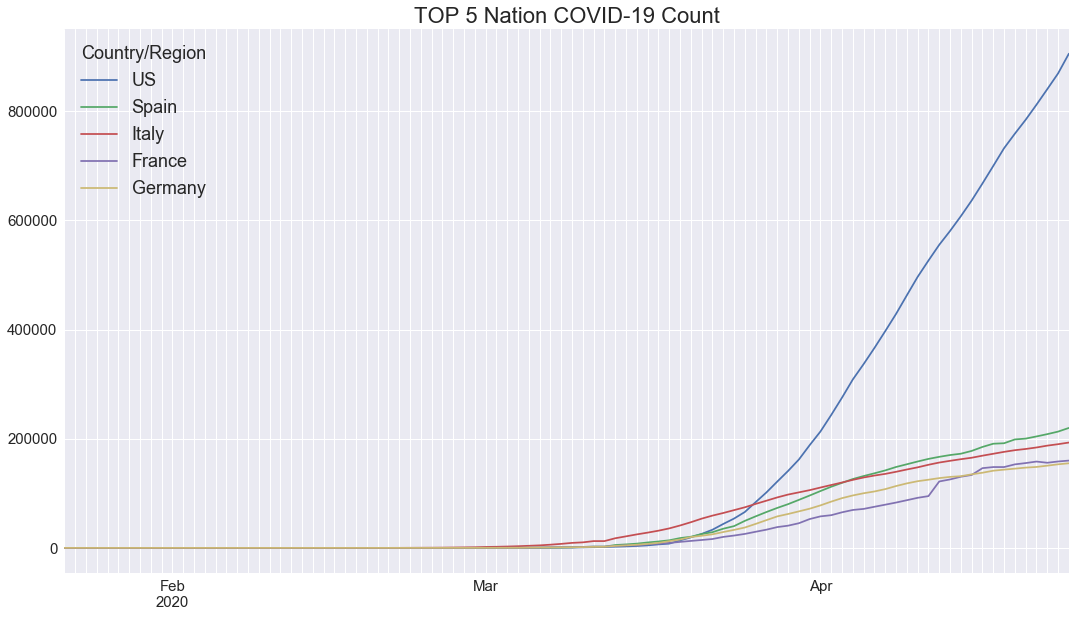

In [20]:
top_5_affected.plot(kind ='line',
                    xticks = top_5_affected.index.to_list(),
                    grid = True,
                    markersize=10,
                    title='TOP 5 Nation COVID-19 Count',
                    figsize = (18,10)
                   )


### 2. Calculate Recovery Rate in TOP 5 Nations affected by COVID-19

In [21]:
global_recovered.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-20,135,327,1099,248,6,3,737,580,4124,10631,...,446,313,261,117,214,71,0,0,35,2
2020-04-21,150,345,1152,282,6,7,840,609,4124,10971,...,638,313,357,117,216,71,0,0,35,2
2020-04-22,166,356,1204,309,6,10,872,633,4124,11328,...,683,324,450,122,223,71,0,0,35,2
2020-04-23,179,385,1355,333,6,10,919,659,4124,11694,...,712,354,561,126,224,92,5,0,37,2
2020-04-24,188,394,1408,344,6,11,976,728,4124,11872,...,724,369,621,132,220,92,5,1,37,2


In [22]:
top_5_recovered = global_recovered[top_5_nation]
top_5_recovered.tail()

Country/Region,US,Spain,Italy,France,Germany
2020-04-20,72329,80587,48877,38036,91500
2020-04-21,75204,82514,51600,39819,95200
2020-04-22,77366,85915,54543,41326,99400
2020-04-23,80203,89250,57576,42762,103300
2020-04-24,99079,92355,60498,44271,109800


In [23]:
recovery_rate = top_5_recovered

In [24]:
for idx,[recover,total] in enumerate(zip(top_5_recovered.values,top_5_affected.values)):
    recovery_rate.values[idx] = np.nan_to_num([recover/total*100])
    

/Users/arpan.kushwaha/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [25]:
recovery_rate.tail()

Country/Region,US,Spain,Italy,France,Germany
2020-04-20,9,40,26,24,62
2020-04-21,9,40,28,25,64
2020-04-22,9,41,29,26,65
2020-04-23,9,41,30,27,67
2020-04-24,10,42,31,27,70


In [26]:
recovery_rate[top_5_nation].mean()

Country/Region
US          6.840426
Spain      22.638298
Italy       8.936170
France     14.170213
Germany    22.510638
dtype: float64

In [27]:
data = np.array([recovery_rate.columns.to_list(),
                 np.around(recovery_rate[top_5_nation].mean().to_list(),3)]).T
pd.DataFrame(data = data,
             columns=['Country','Avg Recovery Rate(%)'])


,Country,Avg Recovery Rate(%)
0,US,6.84
1,Spain,22.638
2,Italy,8.936
3,France,14.17
4,Germany,22.511


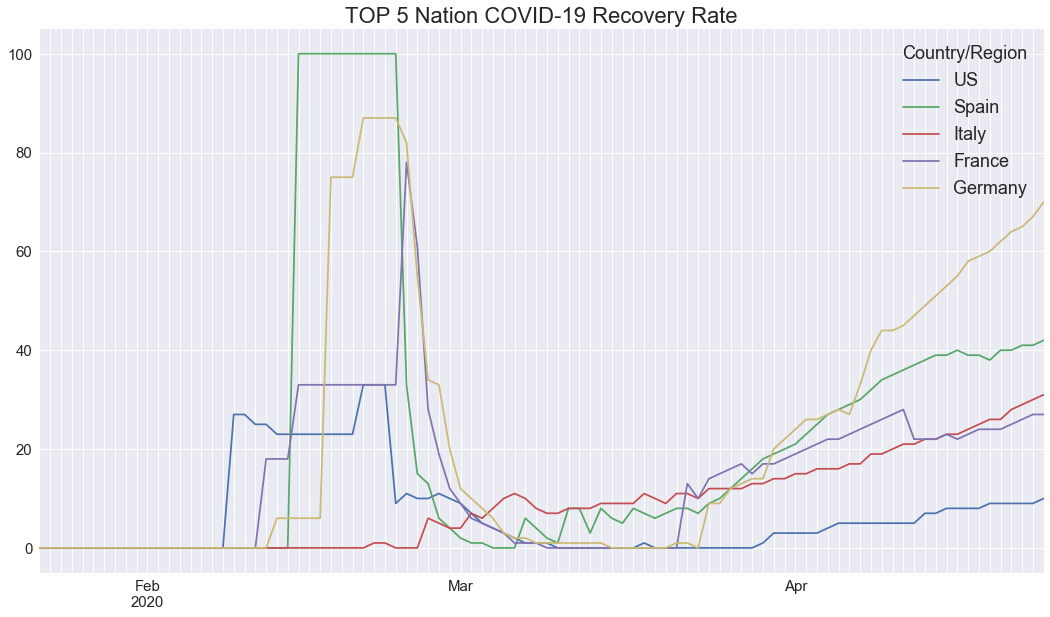

In [28]:
recovery_rate.plot(kind ='line',
                    xticks = recovery_rate.index.to_list(),
                    grid = True,
                    markersize=10,
                    title='TOP 5 Nation COVID-19 Recovery Rate',
                    figsize = (18,10)
                   )


In [29]:
data = np.array([recovery_rate.columns.to_list(),recovery_rate.T[last_col].to_list()]).T
pd.DataFrame(data = data,
             columns=['Country','Recovery Rate(%)'])


,Country,Recovery Rate(%)
0,US,10
1,Spain,42
2,Italy,31
3,France,27
4,Germany,70


### 3. Calculate Mortality Rate among TOP 5 Nation affected by COVID-19

In [30]:
global_death.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-20,36,26,384,37,2,3,136,22,67,470,...,16550,10,5,9,0,3,0,0,3,3
2020-04-21,36,26,392,37,2,3,147,24,67,491,...,17378,11,6,10,0,4,0,0,3,3
2020-04-22,40,27,402,37,2,3,152,24,67,510,...,18151,12,7,10,0,4,0,0,3,4
2020-04-23,42,27,407,37,2,3,165,24,75,522,...,18791,12,7,10,0,4,0,0,3,4
2020-04-24,43,27,415,40,2,3,176,27,79,530,...,19567,12,8,10,0,4,0,0,3,4


In [31]:
top_5_deceased = global_death[top_5_nation]
top_5_deceased.tail()

Country/Region,US,Spain,Italy,France,Germany
2020-04-20,42094,20852,24114,20292,4862
2020-04-21,44444,21282,24648,20829,5033
2020-04-22,46622,21717,25085,21373,5279
2020-04-23,49954,22157,25549,21889,5575
2020-04-24,51949,22524,25969,22279,5760


In [32]:
mortality_rate = top_5_deceased

In [33]:
for idx,[deceased,total] in enumerate(zip(top_5_deceased.values,top_5_affected.values)):
    mortality_rate.values[idx] = np.nan_to_num([deceased/total*100])
    

/Users/arpan.kushwaha/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [34]:
mortality_rate.tail()

Country/Region,US,Spain,Italy,France,Germany
2020-04-20,5,10,13,13,3
2020-04-21,5,10,13,13,3
2020-04-22,5,10,13,13,3
2020-04-23,5,10,13,13,3
2020-04-24,5,10,13,13,3


In [35]:
mortality_rate[top_5_nation].mean()

Country/Region
US         1.638298
Spain      3.734043
Italy      5.680851
France     5.053191
Germany    0.531915
dtype: float64

In [36]:
data = np.array([mortality_rate.columns.to_list(),
                 np.around(mortality_rate[top_5_nation].mean().to_list(),3)]).T
pd.DataFrame(data = data,
             columns=['Country','Avg Mortality Rate(%)'])

,Country,Avg Mortality Rate(%)
0,US,1.638
1,Spain,3.734
2,Italy,5.681
3,France,5.053
4,Germany,0.532


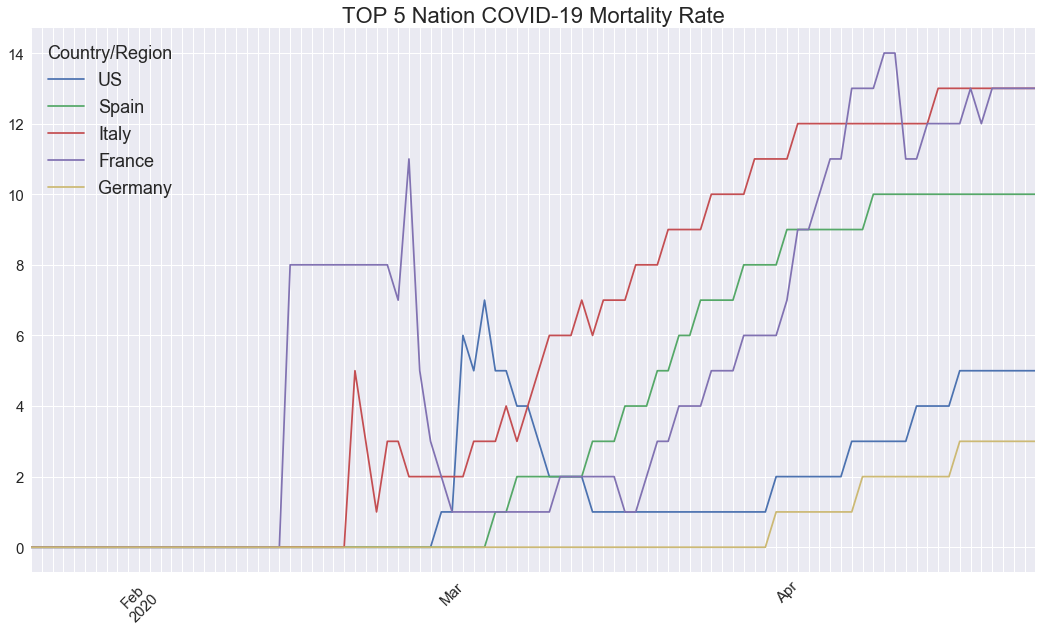

In [37]:
mortality_rate.plot(kind ='line',
                    xticks = mortality_rate.index,
                    grid = True,
                    markersize=10,
                    title='TOP 5 Nation COVID-19 Mortality Rate',
                    figsize = (18,10),
                    rot = 45,
                    legend = True,
                   )


In [38]:
data = np.array([mortality_rate.columns.to_list(),mortality_rate.T[last_col].to_list()]).T
pd.DataFrame(data = data,
             columns=['Country','Mortality Rate(%)'])

,Country,Mortality Rate(%)
0,US,5
1,Spain,10
2,Italy,13
3,France,13
4,Germany,3


### Other Insights

World Population - [here](https://worldpopulationreview.com/countries/) 

In [43]:
pop = pd.read_csv('data/data.csv')


In [44]:
pop.head()

,Rank,name,pop2020,pop2019,GrowthRate,area,Density
0,1,China,1439323.776,1433783.686,1.0039,9706961.0,147.7068
1,2,India,1380004.385,1366417.754,1.0099,3287590.0,415.6290
2,3,United States,331002.651,329064.917,1.0059,9372610.0,35.1092
3,4,Indonesia,273523.615,270625.568,1.0107,1904569.0,142.0928
4,5,Pakistan,220892.340,216565.318,1.0200,881912.0,245.5634


In [45]:
us_pop = int(pop[pop['name']=='United States']['pop2020'].to_list()[0]*1000)
spain_pop = int(pop[pop['name']=='Spain']['pop2020'].to_list()[0]*1000)
italy_pop = int(pop[pop['name']=='Italy']['pop2020'].to_list()[0]*1000)
france_pop = int(pop[pop['name']=='France']['pop2020'].to_list()[0]*1000)
germany_pop = int(pop[pop['name']=='Germany']['pop2020'].to_list()[0]*1000)

top_5_pop = np.array([us_pop,spain_pop,italy_pop,france_pop,germany_pop])
count = np.array(top_5_affected.T[last_col].to_list())
percent_affected = np.around(list(count/top_5_pop*100),3)

In [46]:
data = np.array([recovery_rate.columns.to_list(),percent_affected]).T
pd.DataFrame(data = data,
            columns=['County','Total population affected']
            )

,County,Total population affected
0,US,0.274
1,Spain,0.47
2,Italy,0.319
3,France,0.245
4,Germany,0.185
